# NBA Fantasy Analysis

## About
Fantasy basketball involves a virtual NBA league where NBA enthusiasts unite to create their own teams and compete against other teams in the league. The statistical data used in this fantasy league is derived from the actual performance of NBA players during the specified season. The most widely used platforms for fantasy basketball are Yahoo Fantasy and ESPN. Various league formats and setups exist, but this analysis will focus on the most popular format, which consists of 12 teams competing head-to-head across 9 statistical categories. These categories include Points per game, Three Pointers per game, Rebounds per game, Assists per game, Steals per game, Blocks per game, Field Goal Percentage, Free-Throw Percentage, and Turnovers per game. In this head-to-head format, fantasy teams aim to outperform their weekly opponents by winning the majority of the 9 statistical categories.

## Goal
The primary objective of this analysis is to leverage the 2022-2023 end-of-season NBA data to provide valuable insights for the upcoming NBA fantasy draft. The analysis will focus on identifying significant differences in statistical categories to optimize future draft picks in NBA Fantasy.

## Results
The findings of this analysis will be documented in a comprehensive report, including the analytical procedures and final recommendations. The report will serve as a reliable foundation for making informed decisions.

## Case
The NBA Fantasy draft season commences with a draft where each fantasy team selects 13 players. A successful draft plays a crucial role in determining the outcome of the fantasy season. In this analysis, a ranking system utilizing Z-scores has been replicated using the regular season stats to project areas of scarcity in each statistical category during the draft.


## Data Source
The data utilized in this analysis has been sourced from Basketballmonster.com (BBM), which obtains its data from SportRadar.com. SportRadar is the official NBA stat collector and provides this information as a free service. BBM presents the data in a format that is particularly relevant for fantasy basketball analysis.

The decision to use BBM as the data source instead of NBA.com was primarily driven by the higher precision of decimal places available in BBM's data. NBA.com often rounds decimals to the hundredth place, while BBM offers up to 10 decimal places, ensuring a more accurate analysis.

## Z-Score, Player Ranking, and Assumptions
Z-score is a statistical metric employed to rank players' performance in relation to a specific population. In this analysis, the Z-score is computed as the average of a player's statistic minus the population average, divided by the population standard deviation.

The population size selected for this analysis consists of players who have participated in 20 games or more, encompassing the top 156 players for each statistical category. The choice of 156 players aligns with the common format of 12 teams, with each team comprising 13 players.

This population metric has been employed to ensure relevance to the most commonly encountered format and to avoid any statistical extrapolations. It is worth noting that fantasy leagues on Yahoo and ESPN employ a similar metric, albeit with a projected population size of 156 players.

For the statistical categories of Field Goal Percentage and Free Throw Percentage, a weighted Z-score has been employed. Considering the significance of shooting volumes and percentages in these categories, the weighted Z-score accounts for both the attempts and the shooting percentages.


## Data Cleaning and Transformation
The raw data obtained from Basketballmonster.com was subjected to cleaning processes using SQL and Python within a Jupyter Notebook environment. The Python libraries Pandas and Matplotlib were utilized to facilitate data cleaning, transformation, and generation of visualizations for this project.

By leveraging these methodologies and tools, the analysis aims to provide valuable insights to enhance decision-making during the NBA fantasy draft.





In [1]:
%pip install duckdb-engine --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext sql

In [3]:
%sql duckdb://

## Data Preparation

In [4]:
%%sql
create temporary table BBM2023v2 AS
SELECT *
FROM BBM2023v2.csv
WHERE games >= 20


*  duckdb://
Done.


Count
436


## Calculating Z-Score for 9 Categories

In [5]:
%%sql
create temporary table FINAL_ZSCORES AS
SELECT name, 
((points -
(SELECT AVG(points) as POINTSAVG
FROM
(SELECT points
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY points DESC
limit 156)
))/(SELECT STDDEV_POP(points) as POINTSSDTV
FROM
(SELECT points
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY points DESC
limit 156)
)) as POINTSZSCORE,

((rebounds -
(SELECT AVG(rebounds) as REBOUNDSAVG
FROM
(SELECT rebounds
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY rebounds DESC
limit 156)
))/(SELECT STDDEV_POP(rebounds) as REBOUNDSSDTV
FROM
(SELECT rebounds
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY rebounds DESC
limit 156)
)) as REBOUNDSZSCORE,

((assists -
(SELECT AVG(assists) as ASSISTSAVG
FROM
(SELECT assists
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY assists DESC
limit 156)
))/(SELECT STDDEV_POP(assists) as ASSISTSSDTV
FROM
(SELECT assists
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY assists DESC
limit 156)
)) as ASSISTSZSCORE,

((steals -
(SELECT AVG(steals) as STEALSAVG
FROM
(SELECT steals
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY steals DESC
limit 156)
))/(SELECT STDDEV_POP(steals) as STEALSSDTV
FROM
(SELECT steals
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY steals DESC
limit 156)
)) as STEALSZSCORE,

((blocks -
(SELECT AVG(blocks) as BLOCKSAVG
FROM
(SELECT blocks
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY blocks DESC
limit 156)
))/(SELECT STDDEV_POP(blocks) as BLOCKSSDTV
FROM
(SELECT blocks
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY blocks DESC
limit 156)
)) as BLOCKSZSCORE,

((threepointers -
(SELECT AVG(threepointers) as THREEPOINTERSAVG
FROM
(SELECT threepointers
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY threepointers DESC
limit 156)
))/(SELECT STDDEV_POP(threepointers) as THREEPOINTERSSDTV
FROM
(SELECT threepointers
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY threepointers DESC
limit 156)
)) as THREEPOINTERSZSCORE,

(-1*(turnovers -
(SELECT AVG(turnovers) as TURNOVERSAVG
FROM
(SELECT turnovers
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY turnovers DESC
limit 156)
))/(SELECT STDDEV_POP(turnovers) as TURNOVERSSDTV
FROM
(SELECT turnovers
FROM BBM2023v2.csv
WHERE games >= 20
ORDER BY turnovers DESC
limit 156)
)) as TURNOVERSZSCORE,

((((fgp -
(SELECT AVG(fgp) as FGPAVG
FROM
(SELECT fgp
FROM BBM2023v2.csv
WHERE games >= 20
))) * fga) 
-
(
(SELECT 
AVG(FGW1) AS FWGAVG
FROM
(
SELECT Name, 
((fgp -
(SELECT AVG(fgp) as FGPAVG
FROM
(SELECT fgp
FROM BBM2023v2.csv
WHERE games >= 20
))) * fga) AS FGW1
FROM BBM2023v2.csv
WHERE games >= 20 
ORDER BY FGW1 DESC
LIMIT 156))) 
)
/

 (
(SELECT 
STDDEV_POP(FGW1) AS FWGSSTD
FROM
(
SELECT Name, 
((fgp -
(SELECT AVG(fgp) as FGPAVG
FROM
(SELECT fgp
FROM BBM2023v2.csv
WHERE games >= 20
))) * fga) AS FGW1
FROM BBM2023v2.csv
WHERE games >= 20 
ORDER BY FGW1 DESC
LIMIT 156)))
) AS FGWZSCORE,

((((FTP -
(SELECT AVG(FTP) as FTPAVG
FROM
(SELECT FTP
FROM BBM2023v2.csv
WHERE games >= 20
))) * fta) 
-
((SELECT 
AVG(FTW1) AS FTWAVG
FROM
(
SELECT Name, 
((FTP -
(SELECT AVG(FTP) as FTPAVG
FROM
(SELECT FTP
FROM BBM2023v2.csv
WHERE games >= 20
))) * fta) AS FTW1
FROM BBM2023v2.csv
WHERE games >= 20 
ORDER BY FTW1 DESC
LIMIT 156))) 
)/(
(SELECT 
STDDEV_POP(FTW1) AS FWGSSTD
FROM
(SELECT Name, 
((FTP -
(SELECT AVG(FTP) as FTPAVG
FROM
(SELECT FTP
FROM BBM2023v2.csv
WHERE games >= 20
))) * FTA) AS FTW1
FROM BBM2023v2.csv
WHERE games >= 20 
ORDER BY FTW1 DESC
LIMIT 156)))) AS FTWZSCORE

FROM BBM2023v2.csv

*  duckdb://
Done.


Count
537


In [6]:
%%sql
SELECT *
FROM FINAL_ZSCORES
LIMIT 3

*  duckdb://
Done.


Name,POINTSZSCORE,REBOUNDSZSCORE,ASSISTSZSCORE,STEALSZSCORE,BLOCKSZSCORE,THREEPOINTERSZSCORE,TURNOVERSZSCORE,FGWZSCORE,FTWZSCORE
Nikola Jokic,1.1735847307600358,2.6515373676858895,3.013665493787467,0.7722626552207483,-0.2650387752465303,-1.9135927646926436,-2.1631990197076347,4.022491619028884,0.4032529349843517
Joel Embiid,2.6870342123584363,1.8342853747092107,-0.13338484323665054,-0.2206950838719902,2.022632803830511,-1.6481540177050018,-1.9119838323051759,2.0916554681541975,3.3053634269564713
Shai Gilgeous-Alexander,2.3910276184057664,-0.7672064933961161,0.5900017629374614,2.242229508113458,0.3536553452745463,-1.8726059006844527,-1.0498187877698726,0.3785145523723315,4.93707754767792


## Categorize players by Draft Rounds

In [7]:
%%sql 
create temporary table ZSCORE_RANK_ROUNDS AS
SELECT *, (POINTSZSCORE+REBOUNDSZSCORE+ASSISTSZSCORE+STEALSZSCORE+BLOCKSZSCORE+
THREEPOINTERSZSCORE+TURNOVERSZSCORE+FGWZSCORE+FTWZSCORE) AS TOTALZSCORE, 
(ROW_NUMBER() OVER(ORDER BY TOTALZSCORE DESC)) AS RANK2,
ROUND((RANK2+5.9999)/12) AS DRAFTROUND 
FROM FINAL_ZSCORES
JOIN BBM2023v2
ON FINAL_ZSCORES.Name = BBM2023v2.Name
ORDER BY TOTALZSCORE DESC
LIMIT 180

*  duckdb://
Done.


Count
180


In [8]:
%%sql 
SELECT *
FROM ZSCORE_RANK_ROUNDS
LIMIT 3

*  duckdb://
Done.


Name,POINTSZSCORE,REBOUNDSZSCORE,ASSISTSZSCORE,STEALSZSCORE,BLOCKSZSCORE,THREEPOINTERSZSCORE,TURNOVERSZSCORE,FGWZSCORE,FTWZSCORE,Round,Rank,Value,Name:1,Team,Pos,Inj,games,minutes,points,threepointers,rebounds,assists,steals,blocks,fgp,fga,ftp,fta,turnovers,TOTALZSCORE,RANK2,DRAFTROUND
Joel Embiid,2.6870342123584363,1.8342853747092107,-0.13338484323665054,-0.2206950838719902,2.022632803830511,-1.6481540177050018,-1.9119838323051759,2.0916554681541975,3.3053634269564713,1,2,0.832788146,Joel Embiid,PHI,PF/C,None,66,34.60984848,33.07575758,1.0,10.16666667,4.151515152,1.0,1.696969697,0.548192771,20.12121212,0.857328145,11.68181818,3.409090909,8.026753508890007,1,1.0
Nikola Jokic,1.1735847307600358,2.6515373676858895,3.013665493787467,0.7722626552207483,-0.2650387752465303,-1.9135927646926436,-2.1631990197076347,4.022491619028884,0.4032529349843517,1,1,0.846515171,Nikola Jokic,DEN,C,Probable - right wrist sprain,69,33.68067633,24.49275362,0.826086957,11.84057971,9.826086957,1.260869565,0.68115942,0.632093933,14.8115942,0.821686747,6.014492754,3.579710145,7.694964241820568,2,1.0
Shai Gilgeous-Alexander,2.3910276184057664,-0.7672064933961161,0.5900017629374614,2.242229508113458,0.3536553452745463,-1.8726059006844527,-1.0498187877698726,0.3785145523723315,4.93707754767792,1,3,0.755079863,Shai Gilgeous-Alexander,OKC,PG/SG,None,68,35.52990196,31.39705882,0.852941176,4.838235294,5.455882353,1.647058824,0.955882353,0.510144928,20.29411765,0.905277402,10.86764706,2.823529412,7.202875152931043,3,1.0


In [9]:
%%sql
CREATE TEMPORARY TABLE ZSCORE_RANK_ROUNDS_GROUPED AS

SELECT  CAST(DRAFTROUND AS INT) AS DRAFTROUND, 
AVG(POINTSZSCORE) AS AVG_POINTS_ZSCORE, AVG(REBOUNDSZSCORE) AS AVG_REBOUNDS_ZSCORE, 
AVG(ASSISTSZSCORE) AS AVG_ASSISTS_ZSCORE, AVG(STEALSZSCORE) AS AVG_STEALS_ZSCORE, 
AVG(BLOCKSZSCORE) AS AVG_BLOCKS_ZSCORE, AVG(THREEPOINTERSZSCORE) AS AVG_THREEPOINTERS_ZSCORE, 
AVG(TURNOVERSZSCORE) AS AVG_TURNOVERS_ZSCORE, AVG(FGWZSCORE) AS AVG_FGW_ZSCORE, 
AVG(FTWZSCORE) AS AVG_FTW_ZSCORE, AVG(TOTALZSCORE) AS AVG_TOTAL_ZSCORE,

AVG(minutes) AS AVG_MINUTES, AVG(points) AS AVG_POINTS,	AVG(threepointers) AS AVG_THREEPOINTERS, 
AVG(rebounds) AS AVG_REBOUNDS,	AVG(assists) AS AVG_ASSISTS,	AVG(steals) AS AVG_STEALS,	
AVG(blocks) AS AVG_BLOCKS,	AVG(fgp) AS AVG_FGP, AVG(fga) AS AVG_FGA, AVG(ftp) AS AVG_FTP, 
AVG(fta) AS AVG_FTA,	AVG(turnovers) AS AVG_TURNOVERS

FROM
ZSCORE_RANK_ROUNDS
GROUP BY DRAFTROUND
ORDER BY DRAFTROUND

*  duckdb://
Done.


Count
15


In [10]:
%%sql SELECT * FROM ZSCORE_RANK_ROUNDS_GROUPED
LIMIT 5

*  duckdb://
Done.


DRAFTROUND,AVG_POINTS_ZSCORE,AVG_REBOUNDS_ZSCORE,AVG_ASSISTS_ZSCORE,AVG_STEALS_ZSCORE,AVG_BLOCKS_ZSCORE,AVG_THREEPOINTERS_ZSCORE,AVG_TURNOVERS_ZSCORE,AVG_FGW_ZSCORE,AVG_FTW_ZSCORE,AVG_TOTAL_ZSCORE,AVG_MINUTES,AVG_POINTS,AVG_THREEPOINTERS,AVG_REBOUNDS,AVG_ASSISTS,AVG_STEALS,AVG_BLOCKS,AVG_FGP,AVG_FGA,AVG_FTP,AVG_FTA,AVG_TURNOVERS
1,1.7054148628137897,0.39913954517836653,0.8213030999108684,0.5711274544691781,0.121999977994342,0.11888963587156585,-0.8876243313974169,0.5803914877458921,2.098743095166281,5.5293848277528665,34.93967584000001,27.508843806666665,2.157750864916667,7.2271702368333335,5.872951006083333,1.20802738425,0.8530188541666668,0.5225272626666667,18.208480014166664,0.8721943007499999,7.401617494499999,2.713370888083334
2,1.0555621485636268,0.35104220709567047,0.42972351495329875,0.14664931392023525,0.28913669715750934,0.37610391370411816,-0.698195619073876,-0.6356178505146569,0.3546353973441425,1.669039723150069,34.15211248333333,23.82342946833334,2.3262753108333327,7.128656238583333,5.1668782604166665,1.0965086120833332,0.9272337015000001,0.4942050569999999,16.932628480833333,0.8253678374166666,5.958432421666667,2.584715520916667
3,0.42831473270876064,0.11029857420642797,-0.2103953367591754,0.10049610233013279,0.22206129169274702,-0.46948017957574334,-0.1910262186702232,-0.49748787618571916,-0.1826152669841985,-0.6898341772369913,33.771591055,20.266213241666666,1.7722563349166665,6.63555997225,4.012654463916667,1.0843832539166665,0.8974497557500002,0.5083420138333333,15.242827215083333,0.8083508864166666,4.143366600999999,2.2402584181666665
4,0.4802456771827339,-0.6355268357972239,0.6104332424697695,0.24268792795636374,-0.915015705517855,-0.006178373092232421,-0.3076878698481489,-1.0943776455291725,0.11851418849479846,-1.5069053936809673,34.17368298666666,20.560721586666666,2.0758074475833337,5.107944389666666,5.4927231674999994,1.1217398485,0.39254576950000003,0.48394552616666675,15.570497262749997,0.8288923552499999,4.311867480999999,2.319492169916667
5,0.44718751001007595,-0.28875204689533623,-0.5663788132497367,-0.619313616815332,-0.6486841341393139,-0.23283691597433062,0.17107248104854458,-0.4812958167838152,-0.39809287322906944,-2.6170942260283137,32.41010915083333,20.373243654166668,1.9273028401666668,5.818215941249999,3.3707664791666665,0.8952750563333333,0.5108067776666667,0.5041139769166666,15.138045482999999,0.8007526376666666,4.26921891775,1.9943298015833333


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


GROUPDATA = %sql SELECT * FROM ZSCORE_RANK_ROUNDS_GROUPED
df = pd.DataFrame(GROUPDATA)

PLAYERDATA = %sql SELECT * FROM ZSCORE_RANK_ROUNDS
df2 = pd.DataFrame(PLAYERDATA)


*  duckdb://
Done.
*  duckdb://
Done.


## Data Visuals and Analysis

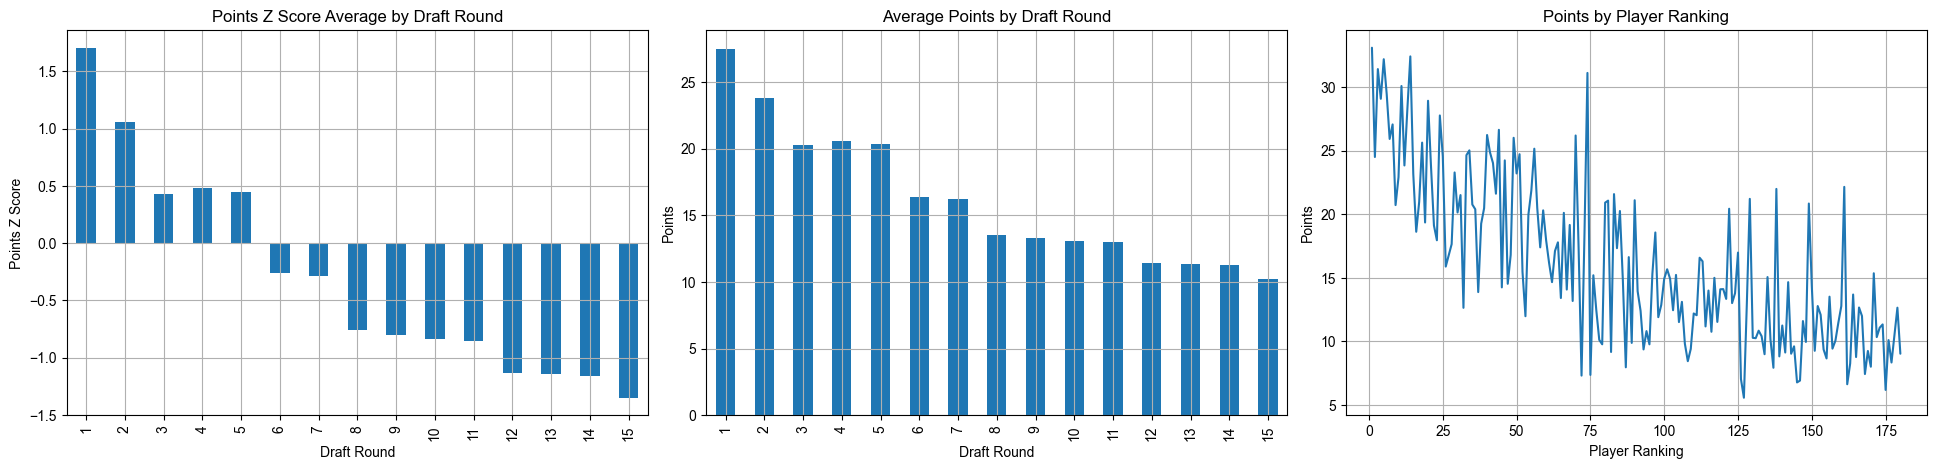

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(24,5))
plt.style.use('seaborn-v0_8-whitegrid')


df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_POINTS_ZSCORE'] ,legend=None, ax=ax[0])
df.plot(kind='bar',x = 'DRAFTROUND' ,y= 'AVG_POINTS',legend=None, ax=ax[1])
df2.plot(kind='line',x = 'RANK2',y= 'points',legend=None, ax=ax[2])
ax[0].title.set_text("Points Z Score Average by Draft Round",)
ax[1].title.set_text("Average Points by Draft Round")
ax[2].title.set_text("Points by Player Ranking")
ax[0].set_ylabel('Points Z Score')
ax[1].set_ylabel('Points')
ax[2].set_ylabel('Points')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Draft Round')
ax[2].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)



### Points Category Analysis

1. There is a significant peak in the Average Z Score during the early rounds, which gradually trends down in the later rounds. 
2. The average points per draft round follows a similar trend, with a notable drop-off after the 5th round. 
3. The Points by player graph exhibits the same downward trend, with a few outliers in the later rounds.


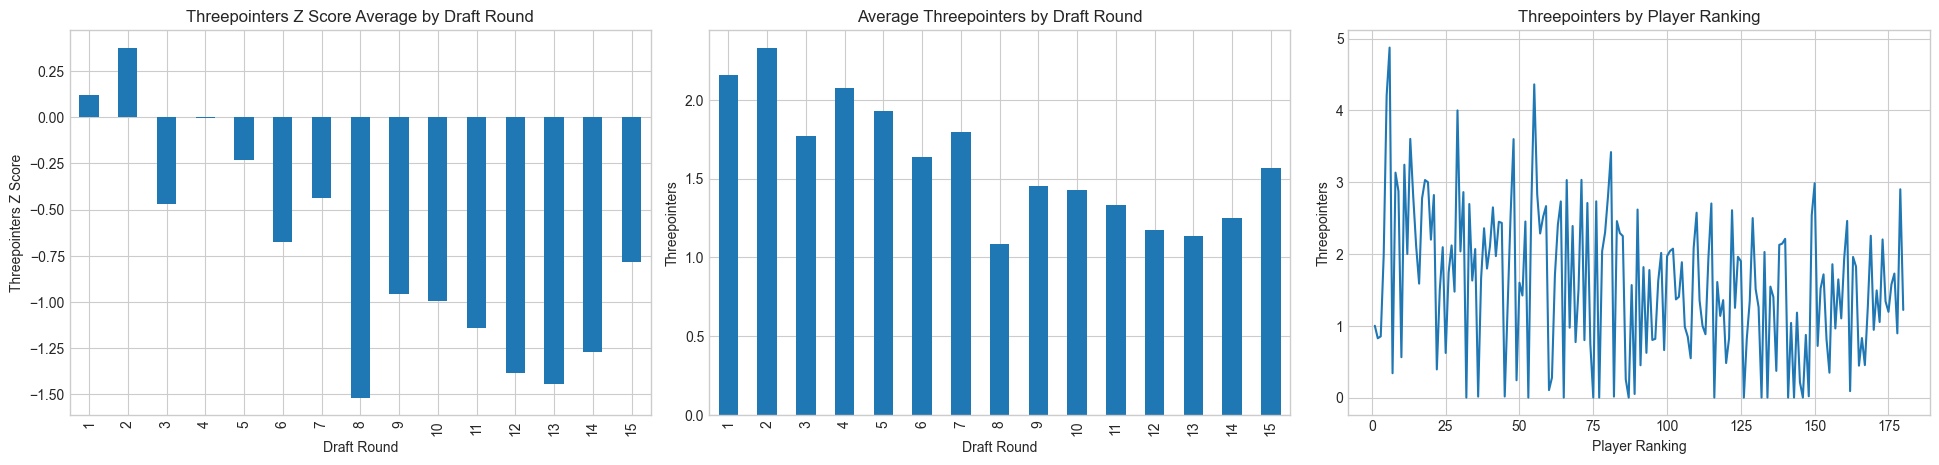

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(24,5))
plt.style.use('seaborn-v0_8-whitegrid')

df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_THREEPOINTERS_ZSCORE'] ,legend=None, ax=ax[0])
df.plot(kind='bar',x = 'DRAFTROUND' ,y= 'AVG_THREEPOINTERS',legend=None, ax=ax[1])
df2.plot(kind='line',x = 'RANK2',y= 'threepointers',legend=None, ax=ax[2])
ax[0].title.set_text("Threepointers Z Score Average by Draft Round",)
ax[1].title.set_text("Average Threepointers by Draft Round")
ax[2].title.set_text("Threepointers by Player Ranking")
ax[0].set_ylabel('Threepointers Z Score')
ax[1].set_ylabel('Threepointers')
ax[2].set_ylabel('Threepointers')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Draft Round')
ax[2].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)


### Threepointers Category Analysis

1. There is a small peak in the Average Z Score during the early rounds, which continues to trend down in the later rounds. 
2. The average three-pointers per draft round appears to follow a more flat curve, with a notable increase in the later rounds. 
3. The Three-Pointers by player graph also shows a fairly flat curve, with several notable outliers throughout the population.

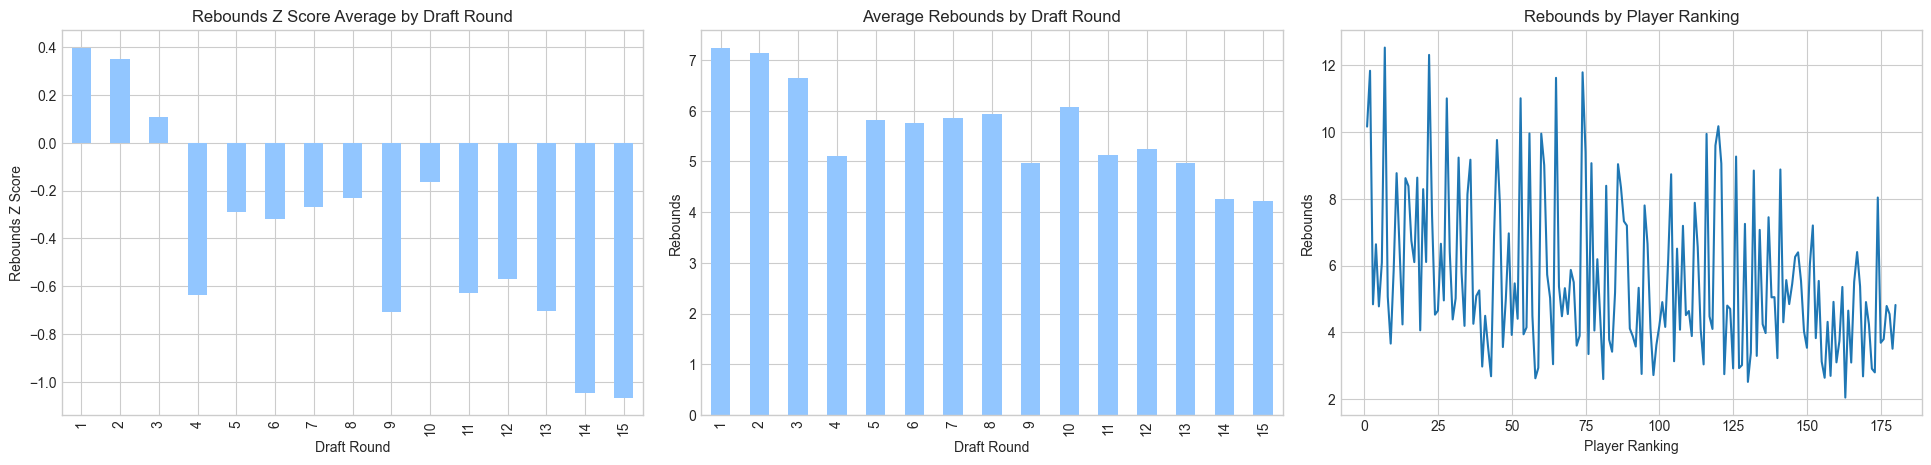

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(24,5))
plt.style.use('seaborn-v0_8-pastel')

df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_REBOUNDS_ZSCORE'] ,legend=None, ax=ax[0])
df.plot(kind='bar',x = 'DRAFTROUND' ,y= 'AVG_REBOUNDS',legend=None, ax=ax[1])
df2.plot(kind='line',x = 'RANK2',y= 'rebounds',legend=None, ax=ax[2])
ax[0].title.set_text("Rebounds Z Score Average by Draft Round",)
ax[1].title.set_text("Average Rebounds by Draft Round")
ax[2].title.set_text("Rebounds by Player Ranking")
ax[0].set_ylabel('Rebounds Z Score')
ax[1].set_ylabel('Rebounds')
ax[2].set_ylabel('Rebounds')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Draft Round')
ax[2].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)


### Rebounds Category Analysis

1. There is a minor peak in the Average Z Score during the early rounds, followed by a downward trend in the later rounds. 
2. The average rebounds per draft round exhibits a slight downward curve with relatively flat middle rounds. 
3. The Rebounds by player graph shows a similar slight downward curve, with several notable outliers throughout the population.

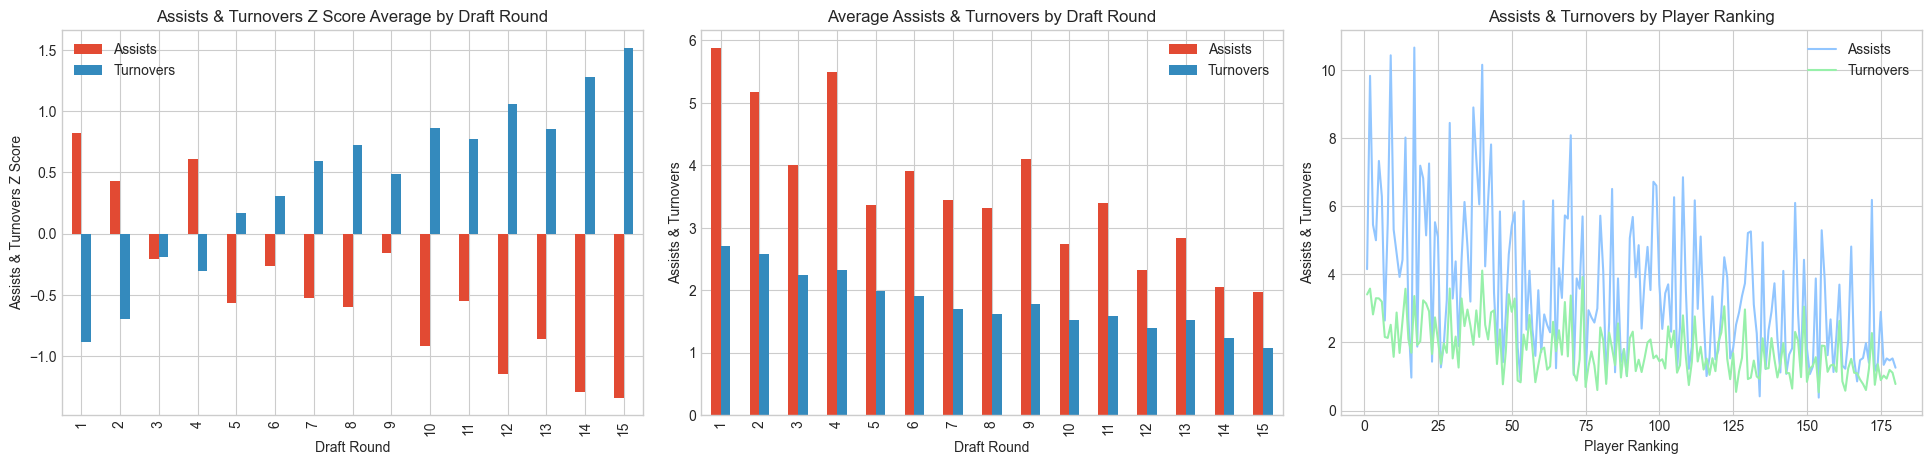

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(24,5))
plt.style.use('ggplot')

df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_ASSISTS_ZSCORE', 'AVG_TURNOVERS_ZSCORE'], label=['Assists','Turnovers'], ax=ax[0])
df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_ASSISTS', 'AVG_TURNOVERS'], label=['Assists','Turnovers'], ax=ax[1])
df2.plot(kind='line',x = 'RANK2',y= ['assists','turnovers'],label=['Assists','Turnovers'], ax=ax[2])
ax[0].title.set_text("Assists & Turnovers Z Score Average by Draft Round",)
ax[1].title.set_text("Average Assists & Turnovers by Draft Round")
ax[2].title.set_text("Assists & Turnovers by Player Ranking")
ax[0].set_ylabel('Assists & Turnovers Z Score')
ax[1].set_ylabel('Assists & Turnovers')
ax[2].set_ylabel('Assists & Turnovers')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Draft Round')
ax[2].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

## Assists & Turnover Analysis

Assists and turnovers share a strong correlation. As assists are positive stats and turnovers are negative, this creates an interesting net effect.

### Assists Category Analysis

1. There is a strong peak in the Average Z Score during the early rounds, which continues to trend down in the later rounds. 
2. The average assists per draft round shows a significant downward curve. 
3. The Assists by player graph also displays a downward curve, with a few outliers throughout the population.

### Turnovers Category Analysis

1. There is a negative peak in the Average Z Score during the early rounds, which trends up in the later rounds. 
2. The average turnovers per draft round appears to show a slight downward curve. 
3. The Turnovers by player graph exhibits a fairly flat downward curve, with few outliers throughout the population.

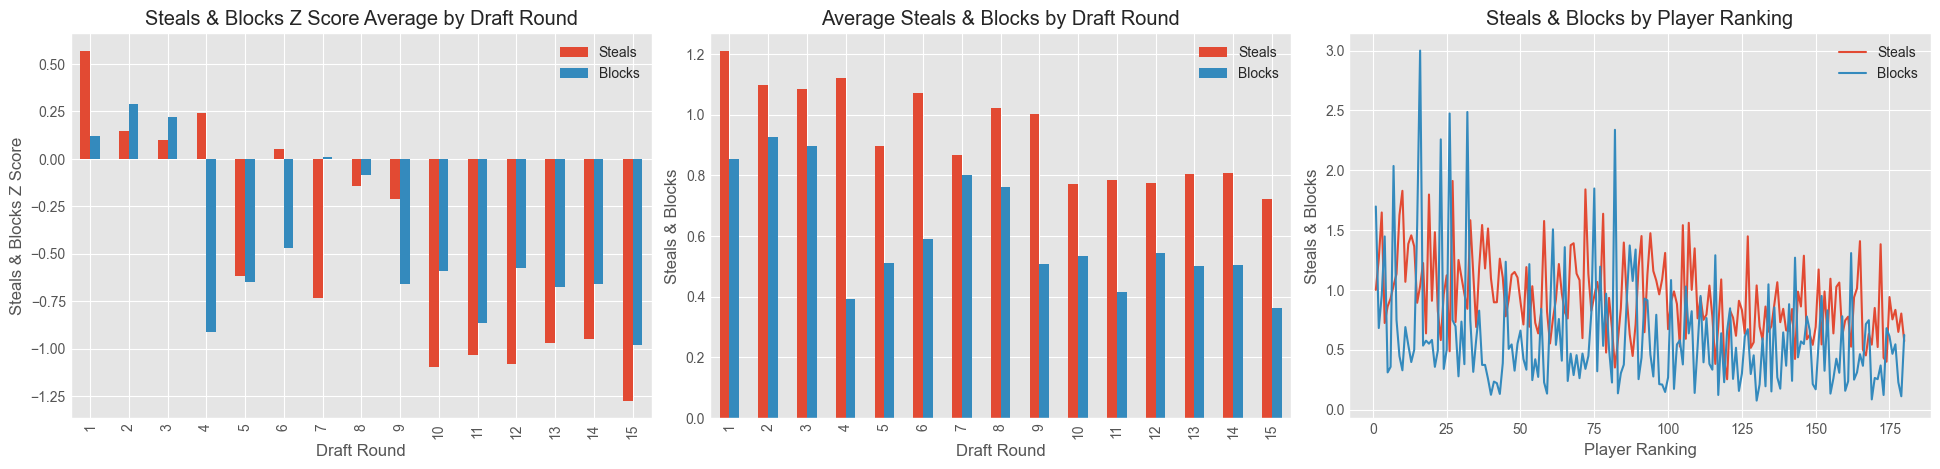

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(24,5))
plt.style.use('ggplot')

df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_STEALS_ZSCORE', 'AVG_BLOCKS_ZSCORE'], label=['Steals','Blocks'],  ax=ax[0])
df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_STEALS', 'AVG_BLOCKS'], label=['Steals','Blocks'], ax=ax[1])
df2.plot(kind='line',x = 'RANK2',y= ['steals','blocks'],label=['Steals','Blocks'], ax=ax[2])
ax[0].title.set_text("Steals & Blocks Z Score Average by Draft Round",)
ax[1].title.set_text("Average Steals & Blocks by Draft Round")
ax[2].title.set_text("Steals & Blocks by Player Ranking")
ax[0].set_ylabel('Steals & Blocks Z Score')
ax[1].set_ylabel('Steals & Blocks')
ax[2].set_ylabel('Steals & Blocks')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Draft Round')
ax[2].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)


## Steals & Blocks Analysis

Steals and blocks are both low count categories. Being defensive category stats with low volume, they can exhibit inconsistency from game to game.

### Steals Category Analysis

1. There is a small peak in the Average Z Score during the early rounds, with some notable Z scores in the late-middle of the draft, followed by a downward trend. 
2. The average steals per draft round shows a slight downward curve, with some notable flat rounds towards the end. 
3. The Steals by player graph displays a fairly flat curve, with several outliers throughout the population.

### Blocks Category Analysis

1. There is a modest peak in the Average Z Score during the early rounds, with some notable Z scores in the late-middle of the draft, followed by a downward trend. 
2. The average blocks per draft round shows a downward trend, with a significant peak in the middle rounds and a flat end. 
3. The Blocks by player graph exhibits a fairly flat curve, with a few significant outliers in the early rounds and a few in the middle of the player ranking.


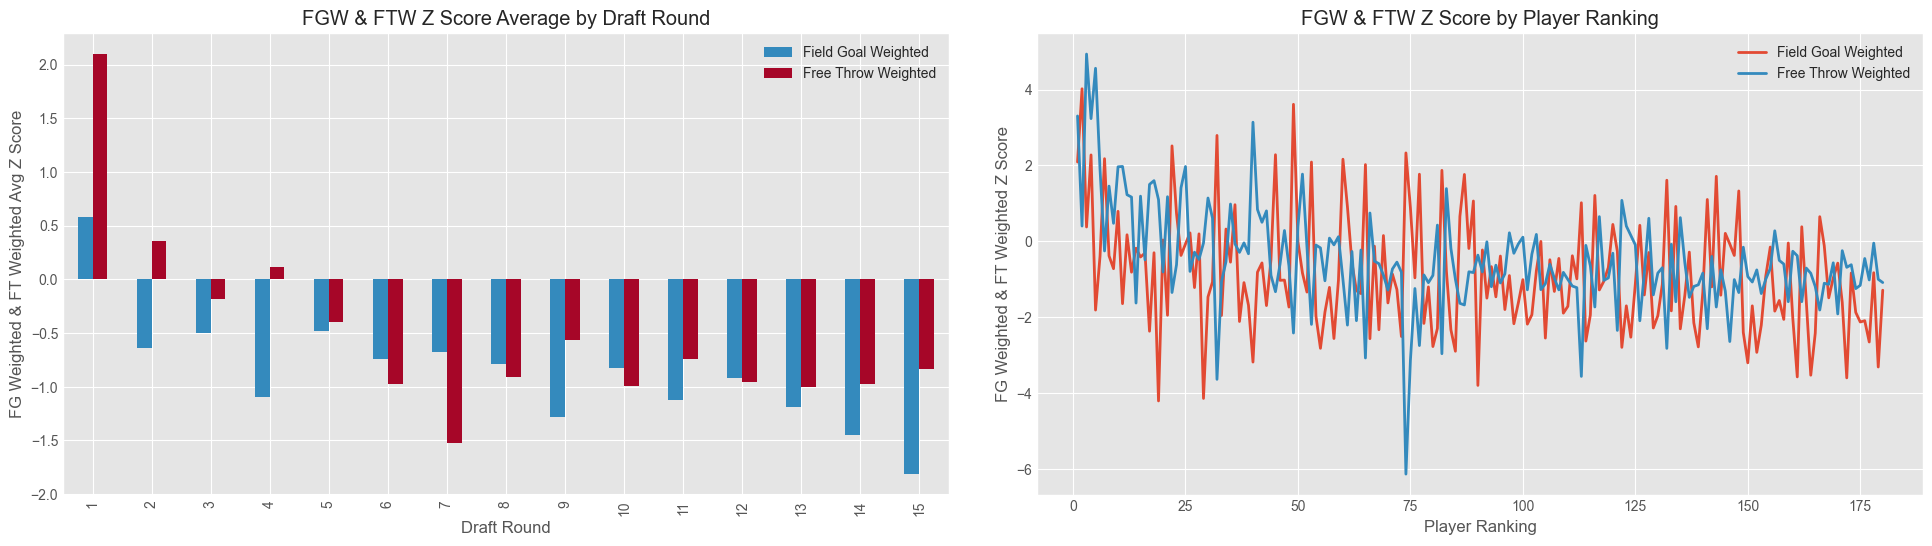

In [17]:

fig, ax = plt.subplots(ncols=2, figsize=(24,6))
plt.style.use('bmh')

df.plot(kind='bar',x = 'DRAFTROUND' ,y= ['AVG_FGW_ZSCORE', 'AVG_FTW_ZSCORE'], label=['Field Goal Weighted', 'Free Throw Weighted'], ax=ax[0])

df2.plot(kind='line',x = 'RANK2',y= ['FGWZSCORE','FTWZSCORE'],label=['Field Goal Weighted','Free Throw Weighted'], ax=ax[1])

ax[0].title.set_text("FGW & FTW Z Score Average by Draft Round",)
ax[1].title.set_text("FGW & FTW Z Score by Player Ranking")
ax[0].set_ylabel('FG Weighted & FT Weighted Avg Z Score')
ax[1].set_ylabel('FG Weighted & FT Weighted Z Score')
ax[0].set_xlabel('Draft Round')
ax[1].set_xlabel('Player Ranking')

plt.subplots_adjust(wspace=0.1, hspace=0.1)


## Field Goal & FreeThrow Analysis

Field Goal Weighted and Free Throw Weighted is the metric used to more acuratly analyze Field Goal Percentage, Field Goal Attempts, Free Throw Percentage, and Free Throw Attempts. For example, a role player who has only shot 1 free throw in the season and has made 100% of his attempts should not be more valued than a star player who has shot 500 free throws and has made 92.5% of his free throws.

Field Goal Weighted (FGW) and Free Throw Weighted (FTW) are metrics used to more accurately analyze field goal percentage, field goal attempts, free throw percentage, and free throw attempts. This accounts for the significance of shooting volumes and percentages in these categories. For instance, a role player who has only attempted one free throw and made 100% of their attempts should not be valued more than a star player who has attempted 500 free throws and made 92.5% of their free throws.

### FGW Category Analysis

1. There is a small peak in the Average Z Score during the early rounds, with a fairly flat curve in the middle of the draft. 
2. The FGW Z Score by player graph shows a slight downward curve, with a fairly flat end of the draft. There are several notable outliers throughout the draft.

### FTW Category Analysis

1. There is a significant peak in the Average Z Score during the early rounds, with a fairly flat curve in the middle of the draft. 
2. The FTW Z Score by player graph shows a slight downward curve, with a fairly flat end of the draft. There are several notable outliers throughout the draft.


# Final Recemondation

## Points 
- I highly recommend prioritizing this category from rounds 1 through 6, as the scoring impact from early-round players is difficult to obtain after the 6th round.

## Three Pointers 
- I suggest a lower priority on this category in the early rounds, as there seem to be many opportunities to draft players who significantly impact this category in the player pool.
 
## Rebounds 
- I suggest a neutral priority in the early portion of the draft, with a higher priority from rounds 6 through the end of the draft.

## Assists 
- I highly recommend prioritizing this category from rounds 1 through 4. Similar to points, this category becomes more challenging to obtain after the 4th round.

## Turnovers 
- Due to the negative nature of this category, it's important to consider a player's turnovers while selecting someone with a strong assist category. Choosing a player with lower negative turnover stats but a high assist upside will result in a more positive net relation. 
 
## Steals 
- I suggest a neutral priority for this category in the early rounds, with more focus in rounds 6 through 7, and a slight priority in the later rounds.

## Blocks 
- Due to the scarcity of significant outliers, I highly recommend prioritizing this category in the early rounds and making it the top priority in rounds 8 and 9.

## Field Goal Percentage / Weighted
- Considering the correlating relationship between points and field goal weighted, I highly recommend prioritizing this category while selecting players with high points per game averages.

## Free Throw Percentage / Weighted
- Due to the limited number of significant outliers, I would not prioritize targeting players solely based on this category. Instead, be mindful of players with a negative impact on free throw percentage throughout the draft.


# Conclusion:
In conclusion, the recommendations provided in this analysis are based on the utilization of NBA's 2022-2023 end-of-season statistics as a projection tool. However, it is crucial to acknowledge that there is no foolproof method for predicting future player statistics with absolute certainty. While a perfect draft does not guarantee a winning season, it significantly enhances the likelihood of assembling a well-balanced team that excels across all 9 categories.

As the 2023-2024 NBA season approaches, it is recommended to conduct a similar analysis using average projections sourced from various NBA Fantasy outlets. This iterative approach will ensure that the latest information and projections are considered when making future draft decisions.

The accompanying graph below provides a visual summary of the recommendations outlined in this analysis.



In [18]:
DFAnalysis = pd.DataFrame({
'DraftRound':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
'Points': [0,0,0,0,0,-1,-2,-3,-4,-5,-6,-8,-8,-8,-8],
'Three Pointers': [-6,-6,-7,-7,-7,-7,-7,-7,-7,-5,-5,-4,-4,-4,-4],
'FGW': [-1,-1,-1,-1,-2,-2,-3,-5,-6,-8,-9,-9,-9,-9,-9],
'FTW': [-4,-4,-6,-6,-6,-7,-8,-8,-8,-8,-8,-8,-8,-8,-8],
'Assists': [-1,-1,-1,-1,-3,-5,-7,-8,-8,-8,-8,-8,-8,-8,-8],
'Rebounds': [-5,-5,-5,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1],
'Steals': [-5,-5,-5,-5,-2,0,0,-2,-2,-3,-3,-3,-3,-3,-3],
'Blocks': [-2,-2,-3,-3,-5,-5,-2,0,0,-2,-2,-2,-2,-2,-2],
'Turnovers': [-3,-3,-4,-4,-5,-7,-9,-9,-9,-9,-9,-9,-9,-9,-9]})


## Final Recommendation Visual



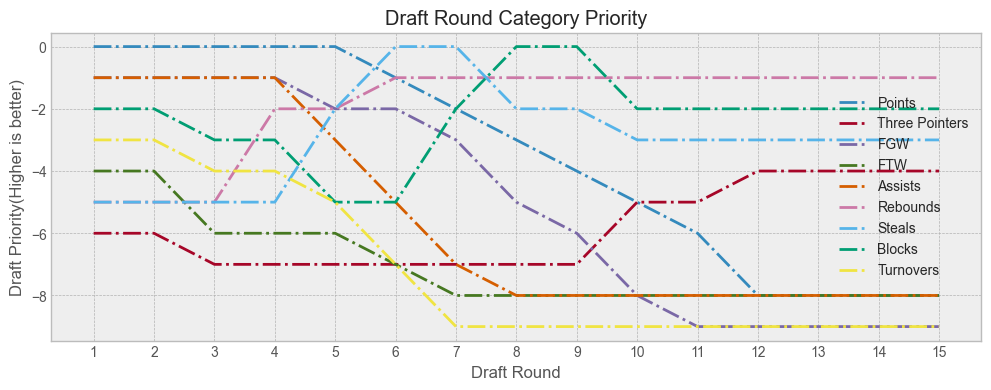

In [19]:
DFAnalysis.plot(x='DraftRound',kind='line',style='-.',figsize=[12, 4],xticks=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15),xlabel='Draft Round', ylabel='Draft Priority(Higher is better)', title='Draft Round Category Priority')
plt.show() 